# FORESEE Models: Dark Higgs

## Load Libraries 

In [1]:
import sys, os
src_path = "../../"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt

## 1. Specifying the Model

The phenomenology of the dark Higgs $\phi$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} =  - \color{red}{m_{\phi}}^2\ \phi^2  - \sin\color{red}{\theta} \ \sum \ (m \ /\ v )\ \bar f \ f  \ \phi - \lambda \ v \ h \phi \phi
\end{equation}

with the dark Higgs mass $m_{\phi}$ and the mixing angle $\theta$ as free parameters. Additionally, one can consider an the tri-linear coupling $\lambda$ as a third parameter of the theory. In the followig, we will keep fixed at $\lambda=0.0033$ corresponding to BR$(h \to \phi\phi)=5\%$.  References [1710.09387](https://arxiv.org/pdf/1710.09387.pdf) and [1811.12522](https://arxiv.org/pdf/1811.12522.pdf) are used for calculation of branching fraction to Dark Higgs as well as decay and lifetime of Dark Higgs boson.

In [2]:
energy = "13.6"
modelname = "DarkHiggs"
model = Model(modelname)

**Production** The Dark Higgs is mainly produced in the flavour changing 2-body decay of $B$-mesons $B \to X_s \phi$. This process includes all b-flavoured hadrons and all strange-flavored decay products. 

\begin{equation}
    \text{BR}(b \to X_s\  \phi) = 5.6 \times (1-m_\phi^2/m_B^2)^2 \times \theta^2
\end{equation}

In the following, we model heavy hadron production using the `POWHEG+Pythia8` predicions.

In [3]:
model.add_production_2bodydecay(
    pid0 = "511",
    pid1 = "130",
    br = "5.6 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),2)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
)

model.add_production_2bodydecay(
    pid0 = "-511",
    pid1 = "130",
    br = "5.6 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),2)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
)

model.add_production_2bodydecay(
    pid0 = "521",
    pid1 = "321",
    br = "5.6 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),2)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
)

model.add_production_2bodydecay(
    pid0 = "-521",
    pid1 = "321",
    br = "5.6 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),2)",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 1000,
)

If the tri-linear coupling does not vanish, the dark Higgs can also be produced in 2-body decays of the Higgs boson: $h \to \phi \phi$. The corresponding branching fraction (for our choice of $\lambda=0.0033$) is

\begin{equation}
    \text{BR}(h \to \phi \  \phi) = 4700 \lambda^2 = 0.05
\end{equation}

Here the line `pid1="0"` means that the second decay product is also the LLP of interest, and `scaling=0` indicates that the branching fraction is constant wrt. the coupling $\theta$. Since we have two $\phi$ in the final state, we include an additional factor 2 in the branching fraction.  

In [4]:
#model.add_production_2bodydecay(
#    pid0 = "25",
#    pid1 = "0",
#    br = "2*0.05",
#    generator = ["Pythia8"],
#    energy = energy,
#    nsample = 200,
#    scaling = 0,
#)

The dark Higgs can also be produced in 3-body decays $B \to X_s \phi \phi$ via an offshell Higgs boson. This can be added using the function `add_production_3bodydecay()`. It requires to provide `br` which is the differential branching fraction $d\text{BR}/(dq^2 \ d\cos\vartheta)$ where $q^2=(p_{\phi_1}+p_{\phi_2})^2$ and $\vartheta$ is the angle between $p_{\phi_1}$ in the restframe of $p_{\phi_1}+p_{\phi_2}$ and the direction of $p_{\phi_1}+p_{\phi_2}$ in the restframe of the $b$. Since the process is mediated by a an offshell scalar (the Higgs), there is no dependence on the angle $\cos\vartheta$. We can write for the branching ratio

\begin{equation}
    \frac{d\text{BR} (\phi)}{d q^2 d\cos\vartheta} 
    = \frac{(4.9\cdot 10^{-8} {\rm GeV}^{-2} \ \lambda)^2 m_b^3}{512 \ \pi^3 \  \Gamma_b} 
      \times \left(1-\frac{4 m_\phi^2}{q^2}\right)^{1/2} \!\!\!\!\! \times \left(1-\frac{q^2}{m_b^2}\right)^2
    = 3.68\cdot 10^{-10}  \times \left(1-\frac{4 m_\phi^2}{q^2}\right)^{1/2}  \!\!\!\!\! \times \left(1-\frac{q^2}{m_b^2}\right)^2
\end{equation}

Since we have two $\phi$ in the final state, we again multiply the BR by an additional factor 2. 
Furthermore, as the factor $3.68\cdot 10^{-10}$ assumed a hard-coded value of $m_b^3=4.5^3$ GeV$^3$, a factor of $(m_b/4.5)^3$ ensures consistency with the $m_b$ definition in `src/foresee.py`.

In [5]:
model.add_production_3bodydecay(
    label= "511_di",
    pid0 = "511",
    pid1 = "130",
    pid2 = "0",
    br = "7.37e-10*(self.masses('5')/4.5)**3*np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 100,
    scaling = 0, 
)

model.add_production_3bodydecay(
    label= "-511_di",
    pid0 = "-511",
    pid1 = "130",
    pid2 = "0",
    br = "7.37e-10*(self.masses('5')/4.5)**3*np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 100,
    scaling = 0, 
)

model.add_production_3bodydecay(
    label= "521_di",
    pid0 = "521",
    pid1 = "321",
    pid2 = "0",
    br = "7.37e-10*(self.masses('5')/4.5)**3*np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 100,
    scaling = 0, 
)

model.add_production_3bodydecay(
    label= "-521_di",
    pid0 = "-521",
    pid1 = "321",
    pid2 = "0",
    br = "7.37e-10*(self.masses('5')/4.5)**3*np.sqrt(1-4*mass**2/q**2)*(1-q**2/self.masses('5')**2)**2",
    generator = ['NLO-P8','NLO-P8-Max', 'NLO-P8-Min'],
    energy = energy,
    nsample = 100,
    scaling = 0, 
)

**Decay:** Dark Higgs bosons can decay into all kinematically accessible light charged states.

In [6]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
    coupling_ref=1
)

decay_modes = ["e_e", "mu_mu", "K_K", "pi_pi"]
model.set_br_1d(
    modes=decay_modes,
    finalstates=[[11,-11], [13,-13], [321,-321], [211,-211]],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

We can now initiate FORESEE with the model that we just created. 

In [7]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{\phi}=1.5$ GeV and $\theta=10^{-4}$ and export events as a HEPMC file. 

In [8]:
mass, coupling, = 1.5, 1e-4

First, we will produce the corresponding flux for this mass and a reference coupling $\theta_{ref}=1$.

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8_m_1.5.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8-Max_m_1.5.npy


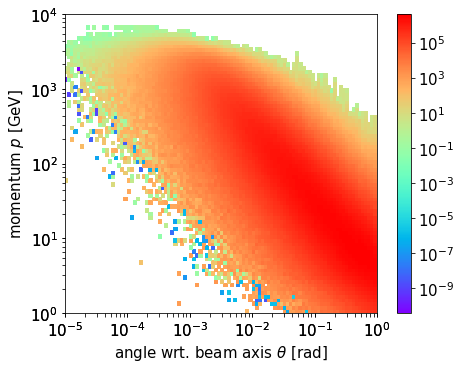

In [9]:
plot=foresee.get_llp_spectrum(mass=mass, coupling=1, do_plot=True)
plot.savefig("Spectrum_"+modelname+".pdf")
plot.show()

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER2 at the FPF. 

In [10]:
foresee.set_detector(
    distance=620, 
    selection="np.sqrt(x.x**2 + x.y**2)<1", 
    length=10, 
    luminosity=3000, 
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [11]:
setupnames = ['POWHEG-central', 'POWHEG-max', 'POWHEG-min']
modes = {
    '511':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-511':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '521':    ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
    '-521':   ['NLO-P8', 'NLO-P8-Max', 'NLO-P8-Min'],
} 

momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True 
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))

Expected number of events for POWHEG-central: 67.258
Expected number of events for POWHEG-max: 103.749
Expected number of events for POWHEG-min: 49.169


Let us plot the resulting energy distribution

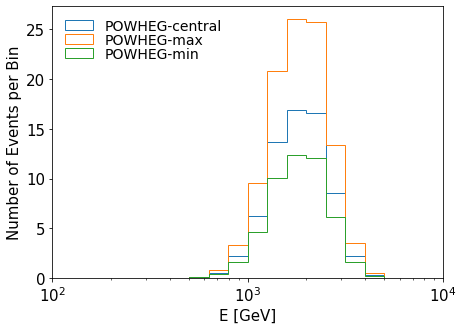

In [12]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper left')
plt.savefig("E_distribution_"+modelname+".pdf")
plt.show()

## 3. Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. For this, we first define a grid of couplings and masses, and then produce the corresponding fluxes. 

In [13]:
masses=[round(x,5) for x in np.logspace(-1,1,20+1)]
couplings = np.logspace(-6,-2,41) 

for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8-Max_m_0.1.npy


save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8-Min_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_di_NLO-P8_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_di_NLO-P8-Max_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_di_NLO-P8-Min_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_di_NLO-P8_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_di_NLO-P8-Max_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_di_NLO-P8-Min_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_di_NLO-P8_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_di_NLO-P8-Max_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_di_NLO-P8-Min_m_0.25119.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.31623.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.31

save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Max_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_NLO-P8-Min_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Max_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_NLO-P8-Min_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Max_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_NLO-P8-Min_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8_m_0.79433.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8-Max_m_0.79433.npy
save data to fil

save data to file: ./model/LLP_spectra/13.6TeV_511_di_NLO-P8-Min_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_di_NLO-P8_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_di_NLO-P8-Max_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_-511_di_NLO-P8-Min_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_di_NLO-P8_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_di_NLO-P8-Max_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_521_di_NLO-P8-Min_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_di_NLO-P8_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_di_NLO-P8-Max_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_-521_di_NLO-P8-Min_m_1.99526.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8_m_2.51189.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Max_m_2.51189.npy
save data to file: ./model/LLP_spectra/13.6TeV_511_NLO-P8-Min_m_2.51

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

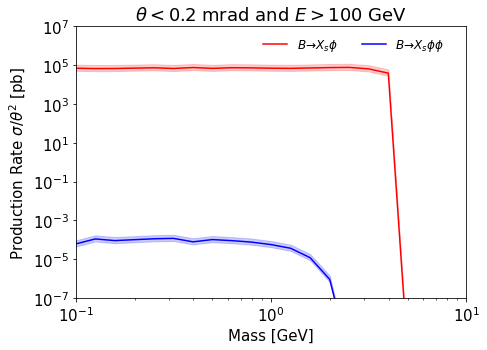

In [14]:
productions=[
     {"channels": ["511","-511","521","-521"]             , "color": "red"  , "label": r"$B \to X_s \phi$"      , "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
     {"channels": ["511_di","-511_di","521_di","-521_di"] , "color": "blue" , "label": r"$B \to X_s \phi\phi$"  , "generators": ["NLO-P8","NLO-P8-Max","NLO-P8-Min"]},
]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.1,10],ylims=[1e-7,1e7],
    xlabel=r"Mass [GeV]",
    ylabel=r"Production Rate $\sigma/\theta^2$ [pb]",
    title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=2,
)
plot.savefig("Production_"+modelname+".pdf")

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER2 configuration, which we set up before.

In [15]:
#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='default'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [16]:
setups = [ 
    ["13.6TeV_default_POWHEG-central.npy", "POWHEG (central)", "red"     ,  "solid"  , 0., 3],
    ["13.6TeV_default_POWHEG-max.npy"    , "POWHEG (max)"    , "magenta" ,  "solid"  , 0., 3],
    ["13.6TeV_default_POWHEG-min.npy"    , "POWHEG (min)"    , "orange"  ,  "solid"  , 0., 3],
]

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation) **UPDATE BOUNDS**

In [17]:
bounds = [ 
    ["bounds_1508.04094.txt", "LHCb $B^0$"  , 0.430, 0.001,  90 ],
    ["bounds_1612.08718.txt", "LHCb $B^+$"  , 0.330, 0.001,  90 ],
    ["bounds_1612.08718.txt", "LHCb $B^+$"  , 2.500, 0.001,  90 ],
    ["bounds_LSND.txt"      , "LSND"        , 0.250, 4.9e-5, 90 ],
    ["bounds_CHARM.txt"     , "CHARM"       , 0.250, 1.8e-4, 90 ],
    ["bounds_MicroBoone.txt", "$\mu$BooNE"  , 0.138, 1.2e-4, 90 ],
    ["bounds_E949.txt"      , "E949"        , 0.102, 8.6e-5, 90 ],
    ["bounds_2011.11329.txt", "NA62 $K^+$"  , 0.170, 2.8e-4, 90 ],
    ["bounds_2010.07644.txt", "NA62 $\pi^+$", 0.125, 1.1e-3, 90 ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [18]:
projections = [
    ["limits_SHiP.txt",       "teal",         "SHiP"    , 2.700, 3.2*10**-5, 0  ],
    ["limits_MATHUSLA.txt",   "dodgerblue",   "MATHUSLA", 0.120, 5.0*10**-6, 0  ],
    ["limits_CodexB.txt",     "deepskyblue",  "CodexB"  , 1.700, 2.0*10**-5, 0  ],
    ["limits_LHCb.txt",       "cyan",         "LHCb"    , 3.800, 1.0*10**-4, 0  ],
]

We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position)  

In [19]:
branchings = [
    ["e_e"       , "red"        , "solid" , r"$ee$"         , 0.110, 0.50],
    ["mu_mu"     , "magenta"    , "solid" , r"$\mu\mu$"     , 0.225, 0.50],
    ["pi_pi"     , "blue"       , "dashed", r"$\pi\pi$"     , 0.350, 0.50],
    ["K_K"       , "forestgreen", "dashed", r"$KK$"         , 0.800, 0.07],
#    ["g_g"       , "gray"       , "dotted", r"$gg$"         , 2.150, 0.70],
#    ["s_s"       , "forestgreen", "dotted", r"$ss$"         , 2.100, 0.17],
#    ["tau_tau"   , "orange"     , "solid" , r"$\tau\tau$"   , 6.000, 0.27],
#    ["c_c"       , "purple"     , "dotted", r"$cc$"         , 7.000, 0.60],
]

Finally, we can plot everything using `foresee.plot_reach()`.

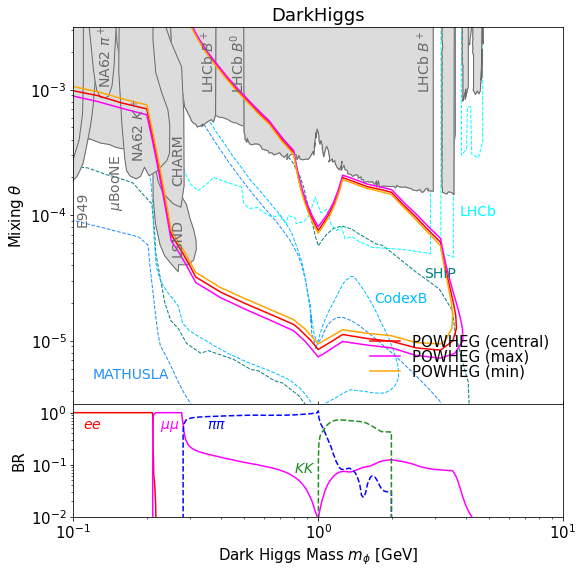

In [20]:
plot, ax1, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    branchings=branchings,
    title="DarkHiggs", 
    xlims=[0.1,10], 
    ylims=[10**-5.5,10**-2.5],
    xlabel=r"Dark Higgs Mass $m_{\phi}$ [GeV]", 
    ylabel=r"Mixing $\theta$",
    legendloc=(1,0.22),
    figsize=(8,8),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("Reach_"+modelname+".pdf")
plot.show()